# Prototipo funcional 1
#### Jose Hurtarte 19707

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
# Cargar el dataset
data = pd.read_csv('data.csv', delimiter=';')


In [4]:
# Extraer las columnas de los electrodos
electrodes_data = data.iloc[:, 2:16]
electrodes_data.head()

,Electrodo1,Electrodo2,Electrodo3,Electrodo4,Electrodo5,Electrodo6,Electrodo7,Electrodo8,Electrodo9,Electrodo10,Electrodo11,Electrodo12,Electrodo13,Electrodo14
0,34.5,23.2,42.1,37.6,25.8,22.4,18.7,45.3,33.6,30.1,29.8,28.7,19.3,21.1
1,32.6,22.4,40.3,36.8,24.7,21.6,17.8,44.2,31.7,28.9,27.6,26.5,18.5,20.2
2,30.7,21.6,38.5,36.0,23.6,20.8,17.0,43.1,29.8,27.7,25.4,24.3,17.7,19.3
3,28.8,20.8,36.7,34.2,22.5,19.9,16.2,42.0,28.9,26.5,24.2,23.1,16.9,18.5
4,26.9,19.9,34.9,32.4,21.4,19.1,15.4,40.9,27.0,24.6,22.8,21.9,16.1,17.7


In [5]:
# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(electrodes_data)

In [68]:
# Aplicar PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

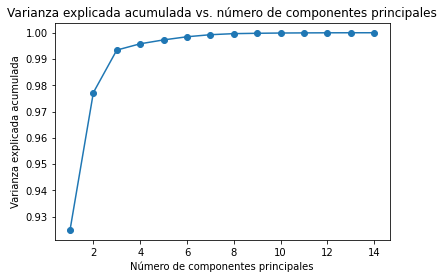

In [69]:
# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Graficar la varianza explicada acumulada
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada vs. número de componentes principales')
plt.show()

In [70]:
n_components = 3
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)
reduced_data

reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
reduced_data


,PC1,PC2,PC3
0,-3.159292,-1.114978,0.081066
1,-1.251215,-1.147150,-0.304348
2,0.642431,-1.166607,-0.676239
3,2.356629,-1.249732,-0.658491
4,4.220096,-1.138495,-0.569525
5,6.081495,-1.028793,-0.469112
6,-4.816916,-0.726533,0.064298
7,-3.112168,-1.094020,0.091630
8,-1.120950,-1.061062,-0.225853
9,0.772696,-1.080519,-0.597745


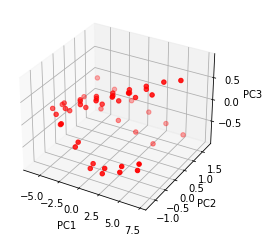

In [71]:
#make a 3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data['PC1'], reduced_data['PC2'], reduced_data['PC3'], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [72]:
#para el calculo del metodo del codo
inertia = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

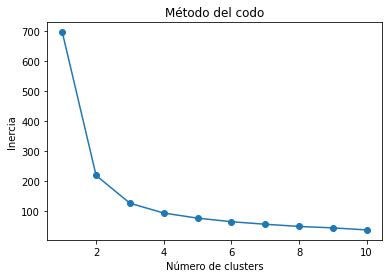

In [73]:
# Graficar el método del codo
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

In [76]:

# Establecer las coordenadas de los centroides iniciales
initial_centroids = np.array([[2.357, -1.25, -0.6585],
                              [3.042, 1.69, -0.716],
                              [3.589, 0.38, 0.68]])


# Crear la instancia de KMeans con los centroides iniciales
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init=initial_centroids, n_init=1, random_state=0)

# Ajustar el modelo a los datos reducidos y predecir las etiquetas de los clusters
labels = kmeans.fit_predict(reduced_data)

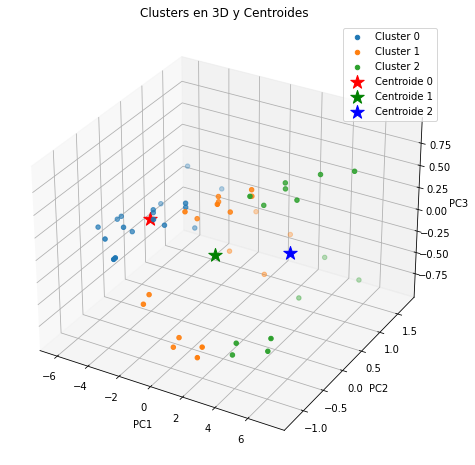

In [77]:


# Agregar las etiquetas de los clusters al DataFrame
reduced_data['Cluster'] = labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en función de los clusters
for cluster in range(optimal_clusters):
    cluster_data = reduced_data[reduced_data['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}')

# Graficar los centroides
centroid_colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'pink', 'orange', 'purple']
for i, centroid in enumerate(kmeans.cluster_centers_):
    ax.scatter(centroid[0], centroid[1], centroid[2], marker='*', s=200, color=centroid_colors[i], label=f'Centroide {i}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('Clusters en 3D y Centroides')
plt.show()


In [78]:
import plotly.express as px

# Agregar la columna de clusters al DataFrame original
reduced_data['Cluster'] = reduced_data['Cluster'].astype(str)

fig = px.scatter_3d(reduced_data, x='PC1', y='PC2', z='PC3', color='Cluster', opacity=0.7, symbol='Cluster', size_max=8, width=800, height=800)

fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'
))

fig.show()